<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_1_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.2_n20.csv',
 'data_add_delta_-1.2_n30.csv',
 'data_add_delta_-1.2_n60.csv',
 'data_add_delta_-1.2_n120.csv',
 'data_add_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,37.345986,45.330817,23.068781,-0.013590,115.731995,115.745245,-0.013250
1,0.0,1.0,61.355111,76.218336,60.215810,0.000224,207.789480,207.789746,-0.000266
2,0.0,2.0,61.381834,36.282080,71.313848,0.004742,178.982504,178.978693,0.003811
3,0.0,3.0,48.209300,45.884552,31.504392,-0.017062,135.581182,135.598163,-0.016981
4,0.0,4.0,46.375243,37.676441,78.909131,-0.005737,172.955078,172.961800,-0.006723
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.218597,99.177166,42.474908,0.003686,205.874357,205.870435,0.003922
249996,999.0,246.0,88.982509,52.554174,53.337121,-0.002452,204.871351,204.874324,-0.002972
249997,999.0,247.0,90.462849,25.854646,86.434381,0.007564,212.759440,212.752991,0.006450
249998,999.0,248.0,95.912938,28.331809,35.353472,0.003505,169.601724,169.598704,0.003021


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,37.345986,45.330817,23.068781,-0.013590,115.731995,115.745245,-0.013250
1,0.0,1.0,61.355111,76.218336,60.215810,0.000224,207.789480,207.789746,-0.000266
2,0.0,2.0,61.381834,36.282080,71.313848,0.004742,178.982504,178.978693,0.003811
3,0.0,3.0,48.209300,45.884552,31.504392,-0.017062,135.581182,135.598163,-0.016981
4,0.0,4.0,46.375243,37.676441,78.909131,-0.005737,172.955078,172.961800,-0.006723
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.218597,99.177166,42.474908,0.003686,205.874357,205.870435,0.003922
249996,999.0,246.0,88.982509,52.554174,53.337121,-0.002452,204.871351,204.874324,-0.002972
249997,999.0,247.0,90.462849,25.854646,86.434381,0.007564,212.759440,212.752991,0.006450
249998,999.0,248.0,95.912938,28.331809,35.353472,0.003505,169.601724,169.598704,0.003021


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    37.345986  45.330817  23.068781  ...  115.731995  115.745245 -0.013250
      1.0    61.355111  76.218336  60.215810  ...  207.789480  207.789746 -0.000266
      2.0    61.381834  36.282080  71.313848  ...  178.982504  178.978693  0.003811
      3.0    48.209300  45.884552  31.504392  ...  135.581182  135.598163 -0.016981
      4.0    46.375243  37.676441  78.909131  ...  172.955078  172.961800 -0.006723
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  54.218597  99.177166  42.474908  ...  205.874357  205.870435  0.003922
      246.0  88.982509  52.554174  53.337121  ...  204.871351  204.874324 -0.002972
      247.0  90.462849  25.854646  86.434381  ...  212.759440  212.752991  0.006450
      248.0  95.912938  28.331809  35.353472  ...  169.601724  169.598704  0.003021
      249.0  78.936965  77.037758  33.456898  ...  199.423749  199.431644 -0.007895

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    37.345986  45.330817  23.068781  ...  115.731995  115.745245 -0.013250
      1.0    61.355111  76.218336  60.215810  ...  207.789480  207.789746 -0.000266
      2.0    61.381834  36.282080  71.313848  ...  178.982504  178.978693  0.003811
      3.0    48.209300  45.884552  31.504392  ...  135.581182  135.598163 -0.016981
      4.0    46.375243  37.676441  78.909131  ...  172.955078  172.961800 -0.006723
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  54.218597  99.177166  42.474908  ...  205.874357  205.870435  0.003922
      246.0  88.982509  52.554174  53.337121  ...  204.871351  204.874324 -0.002972
      247.0  90.462849  25.854646  86.434381  ...  212.759440  212.752991  0.006450
      248.0  95.912938  28.331809  35.353472  ...  169.601724  169.598704  0.003021
      249.0  78.936965  77.037758  33.456898  ...  199.423749  199.431644 -0.007895

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,37.345986,45.330817,23.068781,-0.013590,115.731995,115.745245,-0.013250
1,0.0,1.0,61.355111,76.218336,60.215810,0.000224,207.789480,207.789746,-0.000266
2,0.0,2.0,61.381834,36.282080,71.313848,0.004742,178.982504,178.978693,0.003811
3,0.0,3.0,48.209300,45.884552,31.504392,-0.017062,135.581182,135.598163,-0.016981
4,0.0,4.0,46.375243,37.676441,78.909131,-0.005737,172.955078,172.961800,-0.006723
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.218597,99.177166,42.474908,0.003686,205.874357,205.870435,0.003922
249996,999.0,246.0,88.982509,52.554174,53.337121,-0.002452,204.871351,204.874324,-0.002972
249997,999.0,247.0,90.462849,25.854646,86.434381,0.007564,212.759440,212.752991,0.006450
249998,999.0,248.0,95.912938,28.331809,35.353472,0.003505,169.601724,169.598704,0.003021


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    37.345986  45.330817  23.068781  ...  115.731995  115.745245 -0.013250
      1.0    61.355111  76.218336  60.215810  ...  207.789480  207.789746 -0.000266
      2.0    61.381834  36.282080  71.313848  ...  178.982504  178.978693  0.003811
      3.0    48.209300  45.884552  31.504392  ...  135.581182  135.598163 -0.016981
      4.0    46.375243  37.676441  78.909131  ...  172.955078  172.961800 -0.006723
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  54.218597  99.177166  42.474908  ...  205.874357  205.870435  0.003922
      246.0  88.982509  52.554174  53.337121  ...  204.871351  204.874324 -0.002972
      247.0  90.462849  25.854646  86.434381  ...  212.759440  212.752991  0.006450
      248.0  95.912938  28.331809  35.353472  ...  169.601724  169.598704  0.003021
      249.0  78.936965  77.037758  33.456898  ...  199.423749  199.431644 -0.007895

[250000 rows x 7 columns]

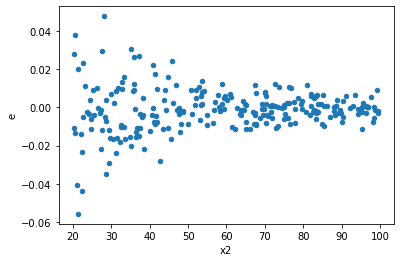

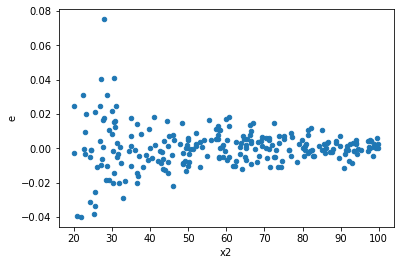

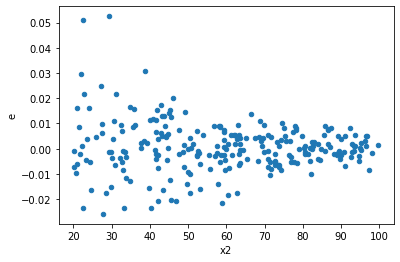

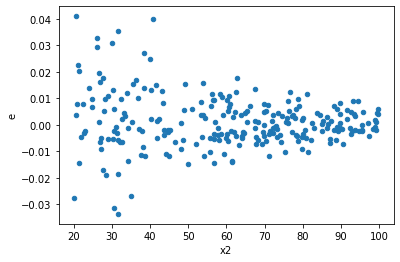

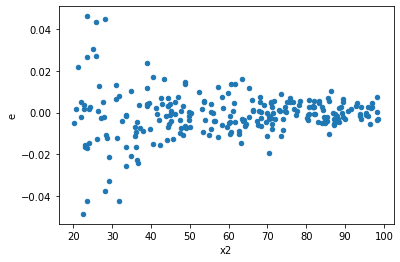

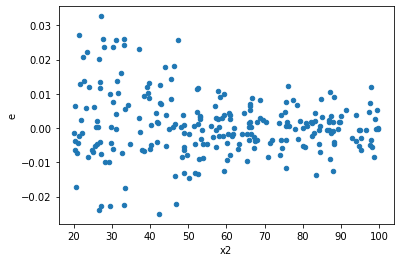

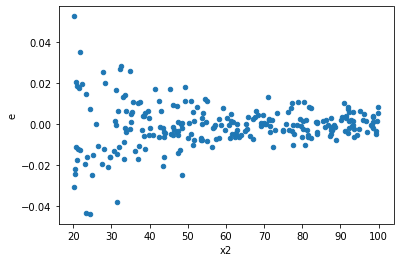

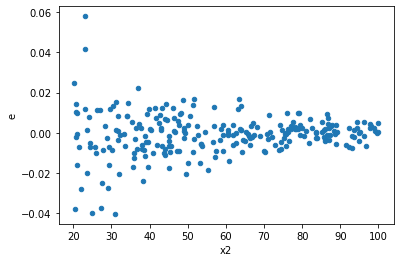

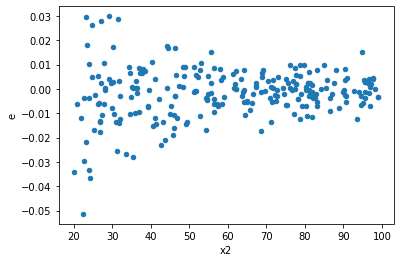

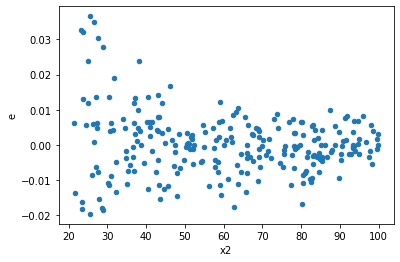

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,0.0021943416754136203,0.015780183548144228,2.2857725785558543e-05,0.0001643769119598357,0.13905679035474072,1.5332125737704076e-19,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,0.0034420423048248474,0.02125804840666288,3.5854607341925496e-05,0.00022143800423607166,0.1619171355234102,3.749617176338512e-17,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,0.0028023628759694394,0.015497959152927579,2.9191279958014994e-05,0.00016143707450966228,0.18082141321427284,1.7230198075105575e-15,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,0.002596814122770646,0.027087385280240548,2.705014711219423e-05,0.000282160263335839,0.0958680247615094,8.779380043966927e-26,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,0.002380094512183741,0.018517199897176418,2.4792651168580634e-05,0.00019288749892892103,0.128534256010633,8.131540134493205e-21,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,0.0025349860861196023,0.03319892747994094,2.6406105063745858e-05,0.00034582216124938475,0.07635746930834622,7.775993346525414e-30,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,0.0020584031090446326,0.03130236553672012,2.1441699052548256e-05,0.0003260663076741679,0.06575870780851897,1.415967443553615e-32,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,0.0025059479714051574,0.021486589490015178,2.6103624702137056e-05,0.00022381864052099145,0.11662846598198712,1.9925200528188088e-22,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,0.002121921852522025,0.017007144278644738,2.210335263043776e-05,0.00017715775290254936,0.12476649916978987,2.6373746081834304e-21,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64